In [1]:
import concurrent.futures
import pyaudio
import cv2
import scipy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.io.wavfile import write
from serial.tools import list_ports

In [48]:
print("Available Audio Devices:")
print("------------------------")
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))
print("------------------------")




Available Audio Devices:
------------------------
Input Device id  0  -  Logi USB Headset
Input Device id  1  -  USBDEVICE2.0
Input Device id  2  -  iMac Microphone
Input Device id  4  -  WebexMediaAudioDevice
Input Device id  5  -  ZoomAudioDevice
------------------------


In [49]:
devinfo = p.get_device_info_by_index(0)  # Or whatever device you care about.
if p.is_format_supported(44100.0,  # Sample rate
                         input_device=devinfo['index'],
                         input_channels=devinfo['maxInputChannels'],
                         input_format=pyaudio.paInt16):
  print('Yay!')
print(devinfo)

Yay!
{'index': 0, 'structVersion': 2, 'name': 'Logi USB Headset', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.005854166666666666, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.0151875, 'defaultSampleRate': 48000.0}


In [ ]:
print("Available Video Device Indexes:")
print("------------------------")
index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1

print(arr)

In [ ]:
print("------------------------")
print("Available COM port:")
print("------------------------")
port = list(list_ports.comports())
for p in port:
    print(p.device)

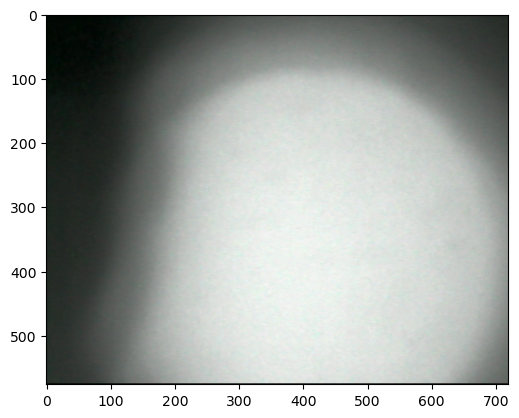

In [55]:
cap = cv2.VideoCapture(0)
frame = cap.read(1)
plt.figure()
plt.imshow(frame[1])
plt.show()


In [15]:
np.shape(frame[1])

(576, 720, 3)

In [137]:

ser = serial.Serial('/dev/cu.usbmodem145401',baudrate=115200)
ser.close()
ser.open()
ser.write('0n1'.encode('utf-8'))
ser.write('2n0'.encode('utf-8'))
while ser.out_waiting>0:
    pass
ser.write('2n1'.encode('utf-8'))
while ser.out_waiting>0:
    pass


In [107]:
ser.write('0n1'.encode('utf-8'))
while True:
    ser.write('2n1'.encode('utf-8'))
    while ser.out_waiting>0:
        pass
    time.sleep(0.001)
    ser.write('2n0'.encode('utf-8'))
    while ser.out_waiting>0:
        pass
    time.sleep(0.001)

# ser.write(50)
# while ser.out_waiting>0:
#     pass
# ser.write(110)
# while ser.out_waiting>0:
#     pass
# ser.write(49)
# while ser.out_waiting>0:
#     pass
#print(ser.out_waiting)



KeyboardInterrupt: 

In [142]:
np.frombuffer(b'(nz', dtype='b')
ser.write('4nz'.encode('utf-8'))

3

In [192]:
ser.write(b'4n'+chr(200).encode('utf-8'))


4

In [193]:
ser.write('2n0'.encode('utf-8'))

3

In [65]:
class Aud_Vid():

    def __init__(self): #, arg
        self.video = cv2.VideoCapture(0)
        self.CHUNK = 1764# 1470 #1470
        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1 #2
        self.RATE = 44100 #44100
        self.INDEVIDX = 0
        self.audio = pyaudio.PyAudio() #input_device_index=self.INDEVIDX,
        self.instream = self.audio.open(input_device_index=self.INDEVIDX,format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,input=True,frames_per_buffer=self.CHUNK)
        self.outstream = self.audio.open(format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,output=True,frames_per_buffer=self.CHUNK)
        print(self.video.get(cv2.CAP_PROP_FRAME_WIDTH))
        # 640.0
        
        print(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT))
        # 360.0
        
        print(self.video.get(cv2.CAP_PROP_FPS))
        # 29.97002997002997
        
        print(self.video.get(cv2.CAP_PROP_FRAME_COUNT))
        # 360.0

        self.video.set(cv2.CAP_PROP_BUFFERSIZE,0)


    def sync(self):
          with concurrent.futures.ThreadPoolExecutor() as executor:
                  tv = executor.submit(self.video.read) 
                  ta = executor.submit(self.instream.read,1764,exception_on_overflow = False) #1470
                  # exception_on_overflow = False
                  vid = tv.result()
                  aud = ta.result()
                  return(vid[1].tobytes(),aud)

In [87]:
aa = []
bb = []
av = Aud_Vid()
rts = []

720.0
576.0
30.00003
0.0


In [67]:
#av.video.get(cv2.CAP_PROP_BUFFERSIZE)
#av.video.get(cv2.CAP_PROP_FPS)
av.instream.get_input_latency()

0.41723356009070295

In [170]:
no_song_band = [500,1500]
song_band = [3000, 8500]
fidx_no_song = [[i for i,e in enumerate(f) if e >= no_song_band[0]][0], [i for i,e in enumerate(f) if e <= no_song_band[1]][-1]]
fidx_song = [[i for i,e in enumerate(f) if e >= song_band[0]][0], [i for i,e in enumerate(f) if e <= song_band[1]][-1]]

[140, 394]

In [195]:
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

0.0

In [174]:
# record 10 seconds of video at 30Hz 
aa = []
bb = []
rts = []
no_song_power = []
song_power = []
ents = []
(a,b) = av.sync()
sig_old = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
for i in range(0,300):
    st = time.time()
    (a,b) = av.sync()
    sig = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
    f,pxx = cp.signal.welch(np.concatenate([sig_old,sig]), fs=44100, window='hann',nfft=2048)
    sig_old = sig
    no_song_power.append(np.sum(pxx[fidx_no_song[0]:fidx_no_song[1]]))
    song_power.append(np.sum(pxx[fidx_song[0]:fidx_song[1]]))
    psong = pxx[fidx_song[0]:fidx_song[1]] / (np.sum(pxx[fidx_song[0]:fidx_song[1]]) + 1e-10)
    ents.append(-sum(psong*np.log2(psong)))
    #f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)
    #et = time.time()

# get the execution time
    #elapsed_time = et - st
    rts.append(st)
    aa.append(a)
    bb.append(b)
st = time.time()
rts.append(st)

25.00029445838724


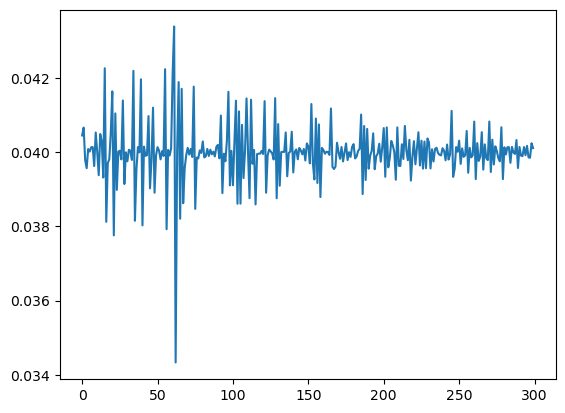

In [175]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1)[1:])))

In [132]:
[len(x) for x in bb]
sig = np.frombuffer(bb[2], dtype='<i2').reshape(-1).astype('float')
f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)
f,pxx = cp.signal.welch(sig, fs=44100, window='hann',nfft=1024)

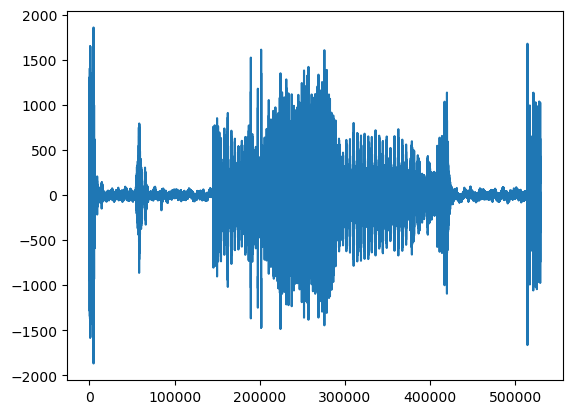

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4'

In [180]:
# create audio-video file
bbx = [np.frombuffer(bx, dtype='<i2').reshape(-1, 1) for bx in bb]
data = np.array(bbx).reshape(-1,1)
plt.figure()
plt.plot(data)
plt.show()
write("example.wav", 44100, data.astype(np.int16))

fourcc = cv2.VideoWriter_fourcc(*'XVID') #XVID
fps = 25
frame_width = 720
frame_height = 576
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))
for ai in aa:
    sig = np.frombuffer(ai, dtype='B').reshape(576,720,3)
    output.write(sig)

output.release()

# now combine audio and video
import subprocess
subprocess.run("ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4")

In [183]:
p=subprocess.Popen("ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4",stdin=subprocess.PIPE)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4'

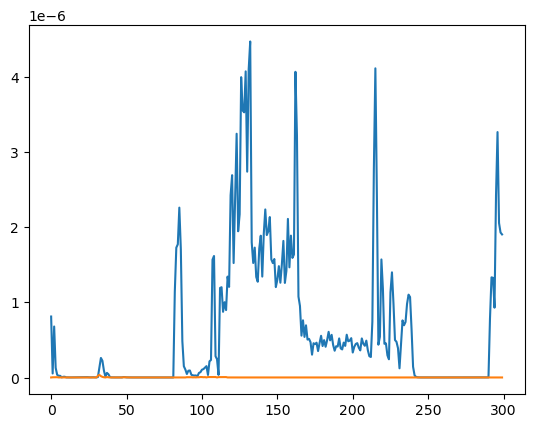

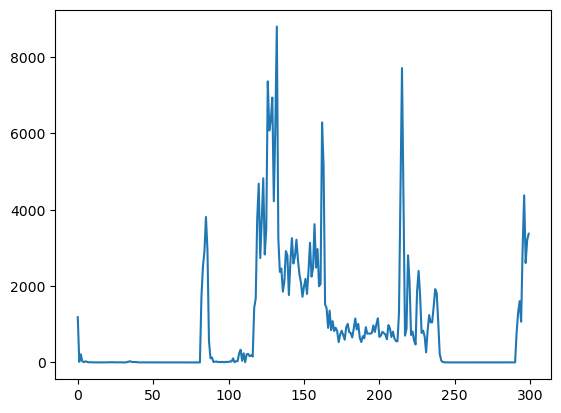

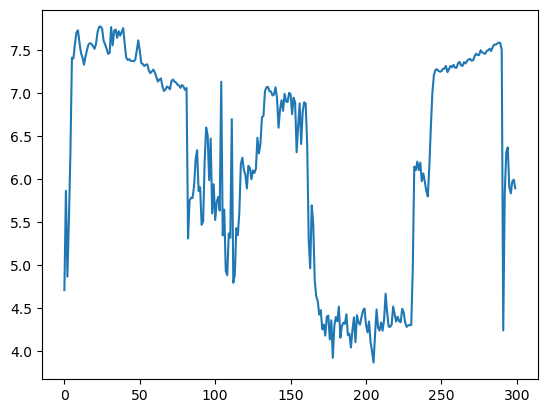

In [176]:
plt.figure()
plt.plot(song_power)
plt.plot(no_song_power)
plt.show()
plt.figure()
plt.plot(np.array(song_power)/(np.array(no_song_power)+1e-15))
plt.show()
plt.figure()
plt.plot(ents)


26.69156737424669


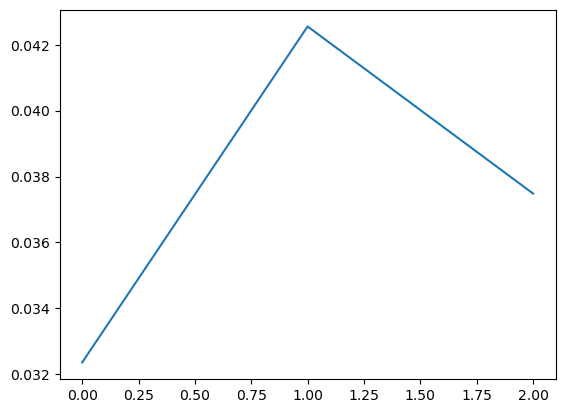

In [146]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1))))

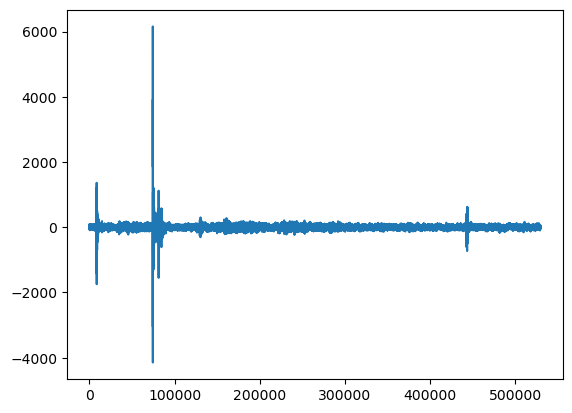

In [75]:
# write audio data
bbx = [np.frombuffer(bx, dtype='<i2').reshape(-1, 1) for bx in bb]
data = np.array(bbx).reshape(-1,1)
plt.figure()
plt.plot(data)
plt.show()
#write("example.wav", 44100, data.astype(np.int16))

In [5]:
#output = cv2.VideoWriter( 
#        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'), 30, (1080, 1920))
# write video data
fourcc = cv2.VideoWriter_fourcc(*'XVID') #XVID
fps = 30
frame_width = 1920
frame_height = 1080
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))
for ai in aa:
    sig = np.frombuffer(ai, dtype='B').reshape(1080,1920,3)
    output.write(sig)

output.release()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [163]:
len(np.concatenate([sig_old,sig]))

3528

In [159]:
np.shape(np.concatenate([sig, sig]))

(3528,)

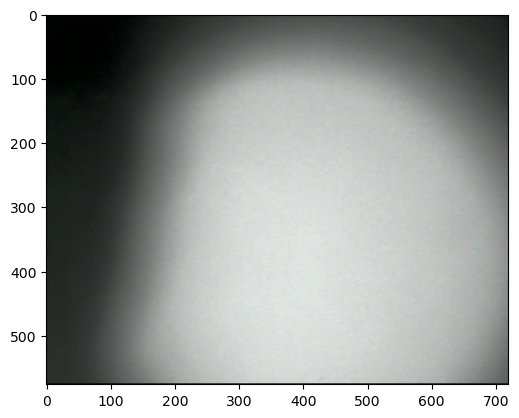

In [11]:
#data_ints = np.array(struct.unpack('<' + 'B'*len(a), aa[9])).reshape(1080,1920,3)
sig = np.frombuffer(aa[20], dtype='B').reshape(576,720,3)
plt.figure()
plt.imshow(sig)
plt.show()

In [8]:
f

array([0.])